In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.optimize import minimize
import scipy.fft as fft

In [2]:
root_dir = r"D:\A-deng\\hunter_data\\0725\\lead_block"
file_names = []

In [3]:
def list_dirs(root_dir):
    '''
    深度优先遍历文件夹，将文件夹下所有文件的路径存入file_names
    '''
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_names.append(os.path.join(root, file))

In [4]:
list_dirs(root_dir)
# file_names = file_names[0:1]

In [5]:
def read_data(file_names):
    '''
    传入所有数据文件，返回数据，数据形式[x, y, increment, data_size]
    '''
    datalist = []
    for file_name in file_names:
        if file_name.endswith('.csv'):
            print(f"Processing file: {file_name}")
            df = pd.read_csv(file_name)
            y = df['Math'].drop(df.index[0]).astype(float).to_numpy()
            x_start = df["Start"].iloc[0].astype(float)
            x_increment = df["Increment"].iloc[0].astype(float)
            data_size = len(y)
            x_end = x_start + x_increment * data_size
            x = np.arange(x_start, x_end, x_increment)
            
            datalist.append([x, y, x_increment, data_size])
            
    return datalist

In [6]:
data_list = read_data(file_names)

Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\empty\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\empty\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\left_270\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\left_270\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\left_90\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\left_90\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\right_270\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\right_270\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\right_90\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\\hunter_data\\0725\\lead_block\right_90\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_42996\2706677540.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [7]:
print(data_list)

[[array([-0.203    , -0.2029992, -0.2029984, ...,  2.1969976,  2.1969984,
        2.1969992]), array([0.2  , 0.218, 0.218, ..., 0.266, 0.272, 0.272]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.1969976,  2.1969984,
        2.1969992]), array([0.0551, 0.0551, 0.0551, ..., 0.0852, 0.0852, 0.0912]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.1969976,  2.1969984,
        2.1969992]), array([0.471, 0.471, 0.471, ..., 0.489, 0.483, 0.483]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.1969976,  2.1969984,
        2.1969992]), array([0.139, 0.133, 0.133, ..., 0.164, 0.164, 0.164]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.1969976,  2.1969984,
        2.1969992]), array([-0.066, -0.066, -0.072, ..., -0.132, -0.138, -0.144]), 8e-07, 3000000], [array([-0.203    , -0.2029992, -0.2029984, ...,  2.1969976,  2.1969984,
        2.1969992]), array([-0.0414, -0.0414, -0.0414, ..., -0.0595, -0.0534, -

In [8]:
# FFT
def do_fft(y, increment, data_size):
    '''
    对y进行FFT变换，返回FFT结果和频率
    '''
    fft_result = fft.fft(y)
    fft_freq = fft.fftfreq(data_size, increment)
    return fft_result, fft_freq

In [9]:
fft_results = []
fft_freqs = []
params_b = []
fft_results_peaks=[]
phases = []
phase=None

for data in data_list:
    fft_result, fft_freq = do_fft(data[1], data[2], data[3])
    fft_results.append(fft_result)
    fft_freqs.append(fft_freq)

    # 寻找FFT结果中的峰值
    peaks, _ = find_peaks(np.abs(fft_result), height=data[3]*0.01)  # height是选中阈值

    # 获取峰值的频率和振幅
    peak_frequencies = fft_freq[peaks]
    peak_amplitudes = np.abs(fft_result[peaks])
    fft_results_peaks.append(fft_result[peaks])
    print(fft_result[peaks])
    angles = np.angle(fft_result[peaks])

    b = 0
    # 打印峰值信息
    for i, frequency in enumerate(peak_frequencies):
        if frequency > 0:
            print(f"峰值 {i + 1}: 频率 = {frequency} Hz, 振幅 = {peak_amplitudes[i]}, 相位 = {angles[i]}")

            if 2 * np.pi * frequency > b:
                b = 2 * np.pi * frequency
                phase = angles[i]
    
    params_b.append(b)
    phases.append(phase)


[381185.33867677+330327.0264632j 381185.33867677-330327.0264632j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 504398.85689218313, 相位 = 0.7140403585934081
[133278.2675928+119421.58916758j 133278.2675928-119421.58916758j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 178954.21920661264, 相位 = 0.7306184915842474
[660647.58223675-55730.91705759j 660647.58223675+55730.91705759j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 662994.0897408798, 相位 = -0.0841587577497141
[229792.82661674-9943.4925273j 229792.82661674+9943.4925273j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 230007.86118772379, 相位 = -0.04324457591197344
[-213208.83573148-325283.93331714j -213208.83573148+325283.93331714j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 388931.4141442462, 相位 = -2.1509964803627635
[-80510.27082123-112680.65584315j -80510.27082123+112680.65584315j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 138487.66699223177, 相位 = -2.1911873508243116
[-641892.16259733+222482.84588473j -641892.16259733-222482.84588473j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 679355.6985238692, 相位 = 2.807945789153766
[-236332.34416393+82260.76862992j -236332.34416393-8226

In [10]:
def ifft_filter(fft_result, fft_freq, desired_frequency, bandwidth):
    '''
    逆FFT滤波，传入参数为数据，采样频率(即1/increment)，数据长度，保留的频率，频率带宽，返回滤波后的数据
    '''

    # 应用滤波器
    fft_result_filtered = np.copy(fft_result)
    fft_result_filtered[(fft_freq > desired_frequency + bandwidth/2) | (fft_freq < desired_frequency - bandwidth/2)] = 0

    # 执行逆FFT
    filtered_signal = fft.ifft(fft_result_filtered)

    # 取实部，因为IFFT的结果可能包含复数
    return filtered_signal.real

In [11]:
def plot_ifft_figure(x, y, filtered_signal):
    '''
    绘制原始和滤波后的信号
    '''
    plt.figure(figsize=(10, 6))
    x_interval = 0.1
    
    plt.plot(x, y, label='source')
    plt.plot(x, filtered_signal, label='filtered red', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xticks(np.arange(min(x), max(x)+x_interval, x_interval))
    plt.show()

 \empty\1.csv : 



d:\anaconda\envs\cnn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


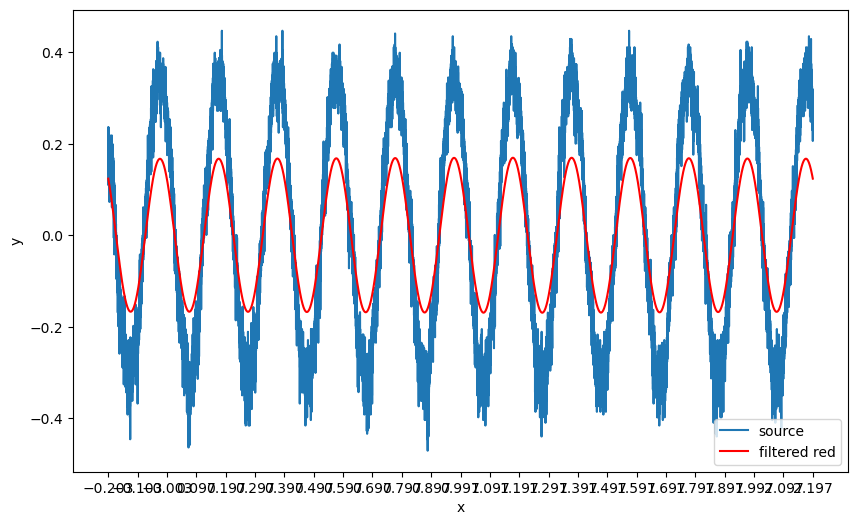

 \empty\2.csv : 



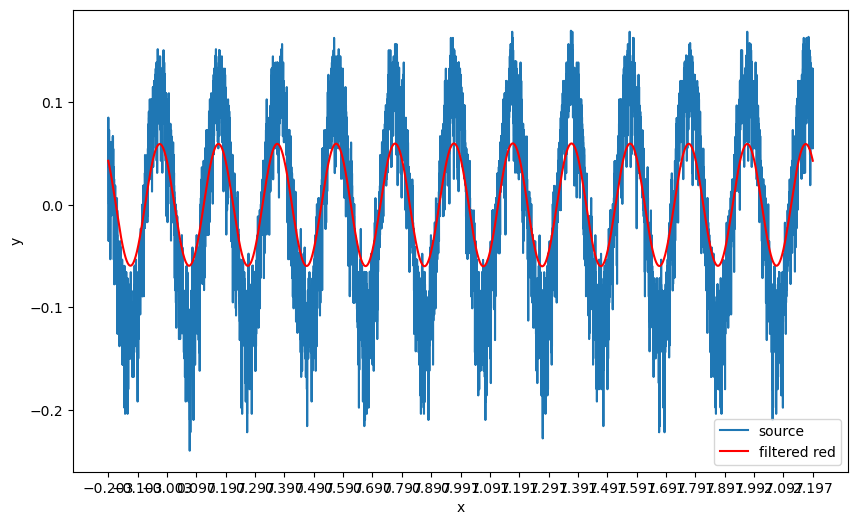

 \left_270\1.csv : 



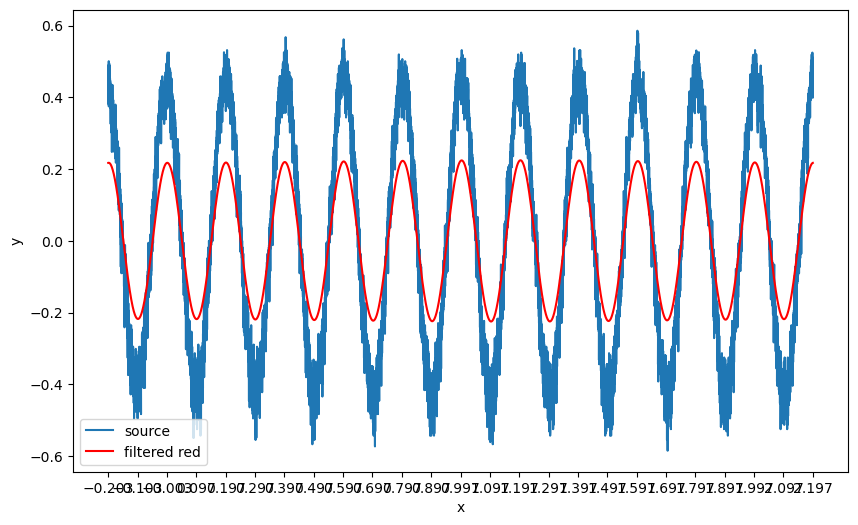

 \left_270\2.csv : 



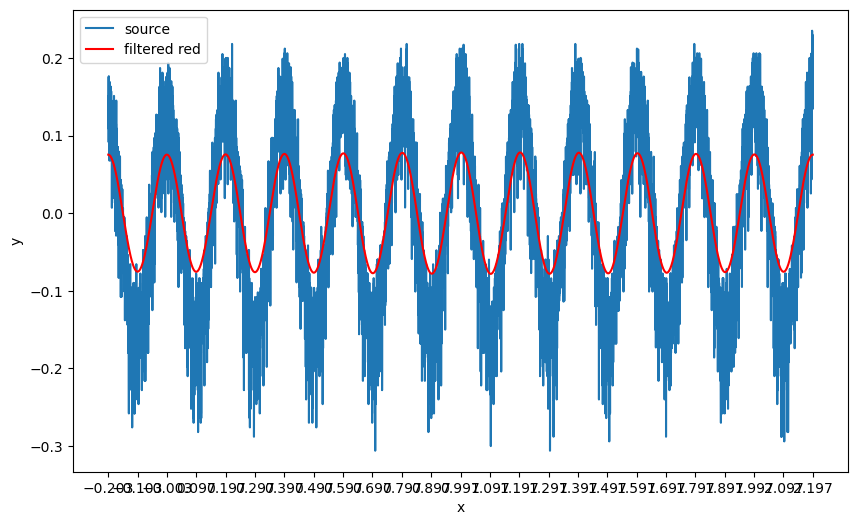

 \left_90\1.csv : 



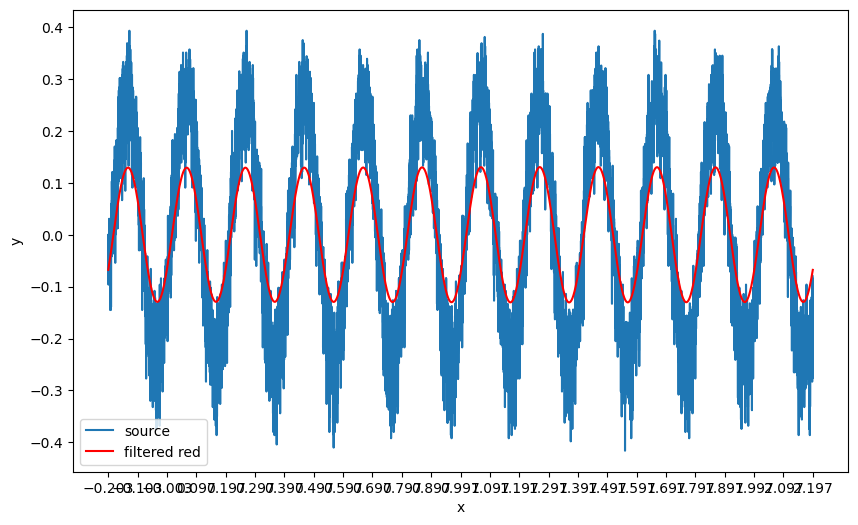

 \left_90\2.csv : 



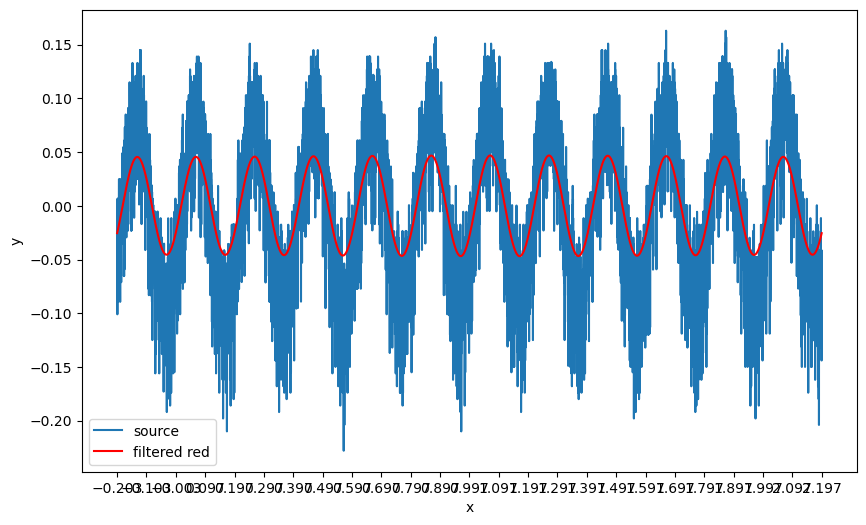

 \right_270\1.csv : 



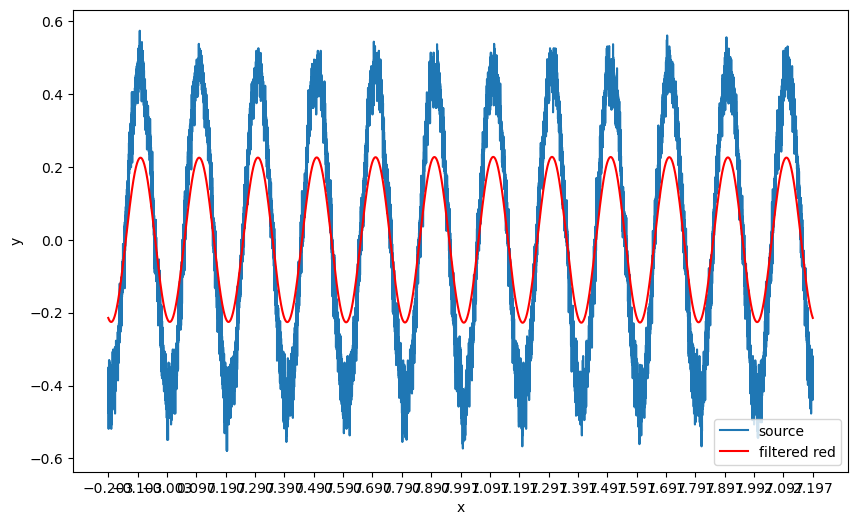

 \right_270\2.csv : 



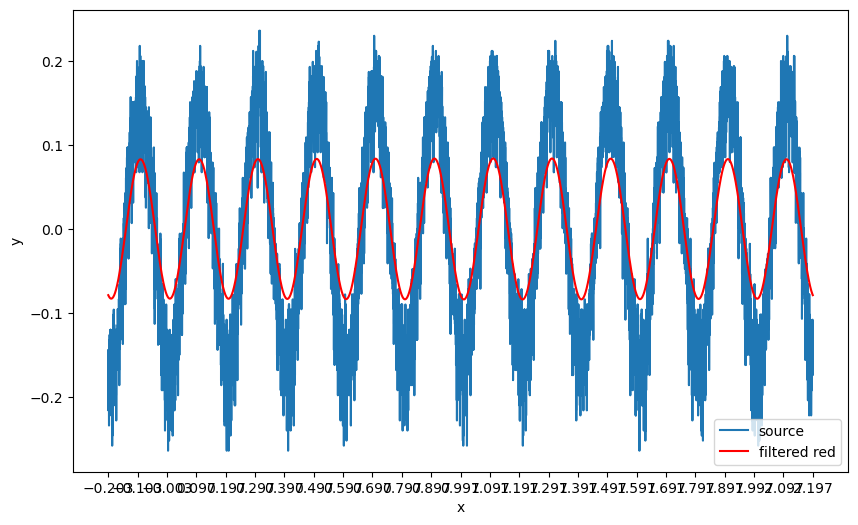

 \right_90\1.csv : 



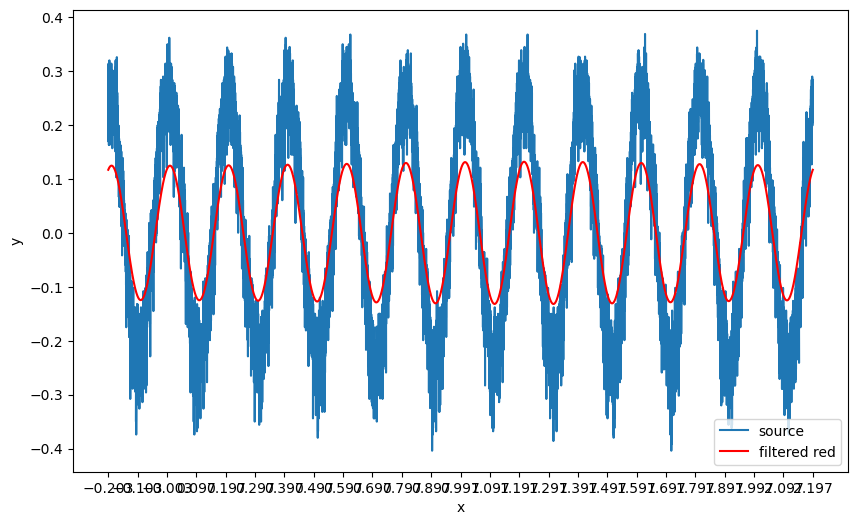

 \right_90\2.csv : 



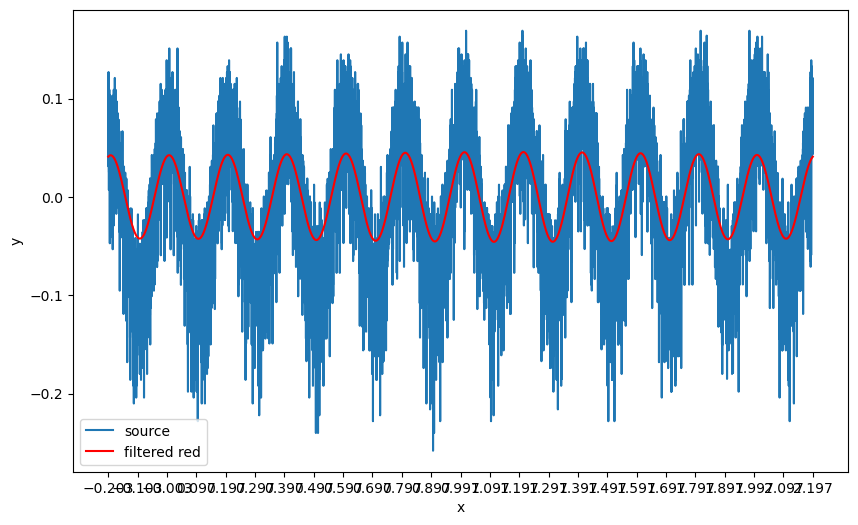

In [12]:
filtered_signals = []

for i in range(len(data_list)):
    filtered_signal = ifft_filter(fft_results[i], fft_freqs[i], params_b[i] / 2 / np.pi, 1)
    filtered_signals.append(filtered_signal)
    print(f" {file_names[i][len(root_dir):]} : \n")
    plot_ifft_figure(data_list[i][0], data_list[i][1], filtered_signal) 

In [13]:
(data_list[i][0].shape, data_list[i][1].shape)

((3000000,), (3000000,))

In [14]:
def plot_curve(x, y, b, popt):
    # 模型函数f(x) = acos(bx+c)
    def func_model(x, a, c):
        return a * np.cos(b * x + c)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='source')
    plt.plot(x, func_model(x, *popt), label='fitting', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [15]:
# 计算滤波后逆FFT得到的a
ifft_fit_popts = []
for i in range(len(filtered_signals)):
    max_a = 0
    max_a_index = 0
    for j in range(len(filtered_signals[i])):
        temp_y = filtered_signals[i][j]
        if temp_y > max_a:
            max_a = temp_y
            max_a_index = j
    
    max_x = data_list[i][0][max_a_index]
    c = - max_x * params_b[i]     # 取最大值时 bx+c = 0

    ifft_fit_popts.append([max_a, c])

In [16]:
# 保存拟合结果
with open('test/fit_result_lead_block.txt', 'w+', encoding="utf-8") as f:
    for i in range(len(filtered_signals)):
         f.write(f" {file_names[i][len(root_dir):]} : \n")
         f.write(f" fft + ifft fit : \n s = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n\n\n")
        #  f.write(f"f = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n")
        # f.write(f" fft + opt fit : \n f = {popts[i][0]} *sin( {params_b[i]} *x + {popts[i][1]} )\n\n")

In [24]:
T_list = []
for i in range(len(filtered_signals)):
  if i == 0:
    continue
  if i == 1:
    continue
# #   sensor1 和 sensor2对应时刻
#   if i % 2 == 1:
#     continue
  T = - phases[i] / 31.41592653589793 + 0.2*4
  T_list.append(T)
  # T_list.append(T)

for i in T_list:
  print(i)

0.8026788564600681
0.8013765176036607
0.8684683444846006
0.8697476596248249
0.7106203095444211
0.7106619984199412
0.8133650621420772
0.8108256652005544


In [25]:
# T_list=[270,270,90,90,270,270,90,90]

t_values = []
T = 0.2

# # 0
# for i in range(len(T_list)):
#     if i == 0 or i == 1 or i == 4 or i == 5: # 270
#         maxT = T_list[i] - 3 * T / 4
#     if i == 2 or i == 3 or i == 6 or i == 7: # 90
#         maxT = T_list[i] - T / 4
#     t_values.append(maxT)

#270
for i in range(len(T_list)):
    if i == 0 or i == 1 or i == 4 or i == 5: # 270
        maxT = T_list[i]
    if i == 2 or i == 3 or i == 6 or i == 7: # 90
        maxT = T_list[i] - 2 * T / 3
    t_values.append(maxT)

for i in t_values:
  print(i)

0.8026788564600681
0.8013765176036607
0.7351350111512673
0.7364143262914916
0.7106203095444211
0.7106619984199412
0.6800317288087439
0.6774923318672211


In [26]:
import math
 #计算F的值
F_values=[]
Fu=[]
Fv=[]
m=0.03
r=0.1778
T = 0.2
# t_standard = 0.7370743034821594 #0度对应的最大值时刻
params_b_squared=(2 * np.pi * frequency)**2
positions=[270,270,90,90,270,270,90,90]

# #0
# Fu=[0,0,0,0]
# Fv=[0,0,0,0]

#270
Fu=[0,0,5.2644469875410635,-5.2644469875410635]
Fv=[5.2644469875410635,-5.2644469875410635,0,0]

print(F_values)
print("Fu:", Fu)
print("Fv:", Fv)

F = np.vstack((Fu, Fv))
print(F)

[]
Fu: [0, 0, 5.2644469875410635, -5.2644469875410635]
Fv: [5.2644469875410635, -5.2644469875410635, 0, 0]
[[ 0.          0.          5.26444699 -5.26444699]
 [ 5.26444699 -5.26444699  0.          0.        ]]


In [27]:
#取t=1,计算Su\Sv
Su=[]
Sv=[]
S_values=[]
for i in range(len(t_values)):
  S_value = ifft_fit_popts[i][0]*np.cos(params_b[i] * t_values[i] +phases[i])
  S_values.append(S_value)

  if i % 2 == 0:
      Su.append(S_value)
  else:
        Sv.append(S_value)
# print(S_values)
print("Su:", Su)
print("Sv:", Sv)

S = np.vstack((Su, Sv))
print(S)

Su: [0.11821521461988863, -0.11772618288314232, 0.03180888365053564, 0.13038147575449882]
Sv: [0.042907766715550376, -0.035417141847777035, 0.01320219491656591, 0.042342493116067456]
[[ 0.11821521 -0.11772618  0.03180888  0.13038148]
 [ 0.04290777 -0.03541714  0.01320219  0.04234249]]


In [28]:
def target_function(S, *parameters):
    A_11, A_12, A_21, A_22 = parameters
    A = np.array([[A_11, A_12], [A_21, A_22]])
    return np.dot(A, S).flatten()

In [29]:
def optimize_A(S_list, F_list):
 
    # S_flat = np.concatenate([S.flatten() for S in S_list])
    # F_flat = np.concatenate([F.flatten() for F in F_list])

    initial_guess_A = [2,2,2,2]

    optimized_A_flat, _ = curve_fit(target_function, S_list, F_list.flatten(), p0=initial_guess_A)

    optimized_A = optimized_A_flat.reshape((2, 2))

    return optimized_A

In [30]:
S_flat = np.concatenate([S.flatten() for S in S])
F_flat = np.concatenate([F.flatten() for F in F])
print(S.shape)
print(F.shape)

(2, 4)
(2, 4)


In [31]:
A_matrix = optimize_A(S, F)

# 输出结果
print("Optimized A matrix:")
print(A_matrix)
print(A_matrix.dot(S) - F) # AS

Optimized A matrix:
[[-187.40616567  531.71647748]
 [  17.60134403   28.66193893]]
[[ 0.66050648  3.23073463 -4.20580333  3.34435583]
 [-1.95388054  2.17718398  0.93827961  3.50850716]]
